In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
ratings = pd.read_csv("ratings.csv")
ratings = ratings[["Title", "Title type", "Genres", "You rated", "IMDb Rating"]]
ratings["Difference"] = ratings.apply(
    lambda row: row["You rated"] - row["IMDb Rating"],
    axis=1)
ratings.sort_values("You rated", ascending=False).head()

,Title,Title type,Genres,You rated,IMDb Rating,Difference
216,The Dark Knight,Feature Film,"action, crime, drama, thriller",10,9.0,1.0
250,Gattaca,Feature Film,"drama, sci_fi, thriller",10,7.8,2.2
217,Inception,Feature Film,"action, adventure, sci_fi, thriller",10,8.8,1.2
234,A Clockwork Orange,Feature Film,"crime, drama, sci_fi",10,8.3,1.7
112,Arrested Development,TV Series,comedy,10,9.0,1.0


## Distribution and comparison of user ratings vs. my ratings

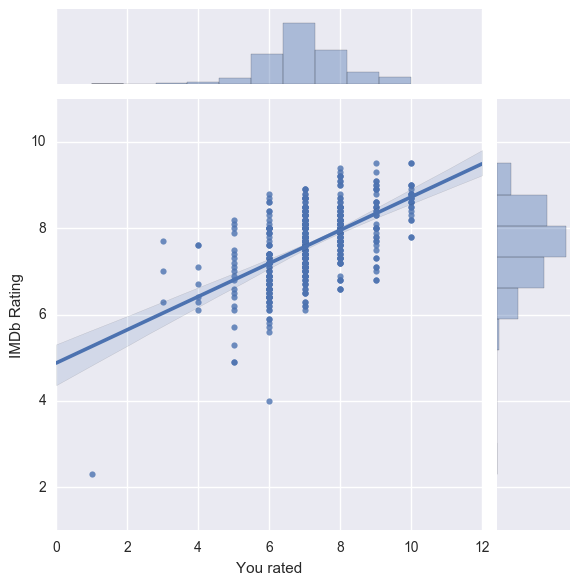

In [3]:
sns.jointplot(x="You rated", y="IMDb Rating",
              data=ratings, kind="reg", stat_func=None,
              marginal_kws={"bins": 10, "kde": False});

## Distributions of my ratings accross title type

Note: Everything except *Feature film* and *TV series* has too few data points

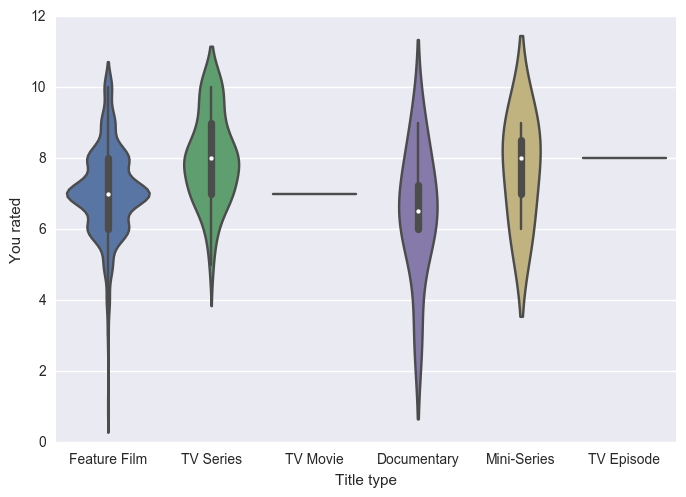

In [17]:
sns.violinplot(x="Title type", y="You rated", data=ratings);
plt.ylim([0, 12]);

## Movies I dislike (comparatively)

In [14]:
movie_ratings = ratings[ratings["Title type"] == "Feature Film"]

movie_ratings.sort_values("Difference").head(10)

,Title,Title type,Genres,You rated,IMDb Rating,Difference
278,300,Feature Film,"action, drama, fantasy",3,7.7,-4.7
30,Warcraft,Feature Film,"action, adventure, fantasy",3,7.0,-4.0
388,Superbad,Feature Film,comedy,4,7.6,-3.6
492,The Raid: Redemption,Feature Film,"action, crime, thriller",4,7.6,-3.6
292,Bronson,Feature Film,"action, biography, crime, drama",4,7.1,-3.1
366,No Country for Old Men,Feature Film,"crime, drama, thriller",5,8.1,-3.1
375,Pirates of the Caribbean: The Curse of the Bla...,Feature Film,"action, adventure, fantasy",5,8.0,-3.0
351,The Hobbit: The Desolation of Smaug,Feature Film,"adventure, fantasy",5,7.9,-2.9
271,Shoot 'Em Up,Feature Film,"action, comedy, crime, thriller",4,6.7,-2.7
406,Once Upon a Time in the West,Feature Film,western,6,8.6,-2.6


## Movies I like (comparatively)

In [6]:
movie_ratings.sort_values("Difference", ascending=False).head(10)

,Title,Title type,Genres,You rated,IMDb Rating,Difference
247,The Game,Feature Film,"drama, mystery, thriller",10,7.8,2.2
250,Gattaca,Feature Film,"drama, sci_fi, thriller",10,7.8,2.2
207,eXistenZ,Feature Film,"action, horror, sci_fi, thriller",9,6.8,2.2
307,Cypher,Feature Film,"mystery, sci_fi, thriller",9,6.8,2.2
252,Burn After Reading,Feature Film,"comedy, drama",9,7.0,2.0
329,The Calling,Feature Film,"horror, thriller",6,4.0,2.0
499,Phone Booth,Feature Film,"crime, thriller",9,7.1,1.9
163,Melancholia,Feature Film,drama,9,7.1,1.9
246,Gran Torino,Feature Film,drama,10,8.2,1.8
241,V for Vendetta,Feature Film,"action, drama, thriller",10,8.2,1.8


## TV series I dislike (comparatively)

In [7]:
series_ratings = ratings[ratings["Title type"] == "TV Series"]

series_ratings.sort_values("Difference").head(10)

,Title,Title type,Genres,You rated,IMDb Rating,Difference
39,Master of None,TV Series,comedy,5,8.2,-3.2
185,Daredevil,TV Series,"action, crime, drama, sci_fi, thriller",6,8.8,-2.8
330,The Walking Dead,TV Series,"drama, horror, thriller",6,8.6,-2.6
275,Orphan Black,TV Series,"action, drama, sci_fi",6,8.4,-2.4
361,Twin Peaks,TV Series,"crime, drama, mystery, thriller",7,8.9,-1.9
111,Better Call Saul,TV Series,"crime, drama",7,8.7,-1.7
101,The Shield,TV Series,"crime, drama, thriller",7,8.7,-1.7
405,Battlestar Galactica,TV Series,"action, adventure, drama, sci_fi",7,8.7,-1.7
81,Mr. Robot,TV Series,"crime, drama, thriller",7,8.7,-1.7
97,Hannibal,TV Series,"crime, drama, horror, mystery, thriller",7,8.6,-1.6


## TV series I like (comparatively)

In [9]:
series_ratings.sort_values("Difference", ascending=False).head(10)

,Title,Title type,Genres,You rated,IMDb Rating,Difference
171,Archer,TV Series,"animation, action, comedy",10,8.8,1.2
108,Making a Murderer,TV Series,"documentary, crime",10,8.8,1.2
27,Black Mirror,TV Series,"drama, sci_fi, thriller",10,8.9,1.1
339,House of Cards,TV Series,drama,10,9.0,1.0
112,Arrested Development,TV Series,comedy,10,9.0,1.0
334,Breaking Bad,TV Series,"crime, drama, thriller",10,9.5,0.5
2,Game of Thrones,TV Series,"adventure, drama, fantasy, romance",10,9.5,0.5
100,The Simpsons,TV Series,"animation, comedy",9,8.8,0.2
174,Narcos,TV Series,"biography, crime, drama",9,8.9,0.1
251,Death Note,TV Series,"animation, crime, drama, fantasy, horror, myst...",9,9.0,0.0


## Genres

In [105]:
genres = defaultdict(list)
for _, row in ratings.iterrows():
    for genre in row["Genres"].split(", "):
        genres[genre].append(row)

# Remove genres with less than 5 entries
genres = {genre: pd.DataFrame(entries)
          for genre, entries in genres.items()
          if len(entries) > 5}

byGenre = None
for genre, dframe in genres.items():
    dframe["Genre"] = genre
    if byGenre is None:
        byGenre = dframe
    else:
        byGenre = byGenre.append(dframe)

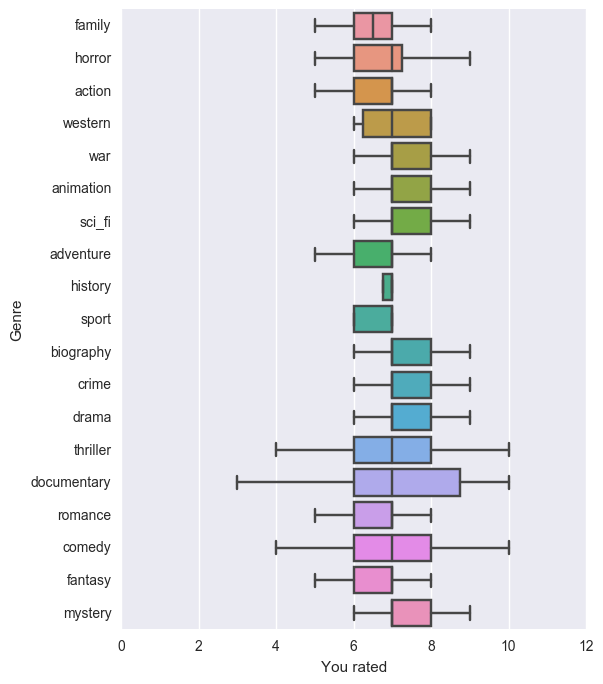

In [128]:
plt.figure(figsize=(6, 8))
sns.boxplot(x="You rated", y="Genre", fliersize=0, data=byGenre);
plt.xlim([0, 12]);